# Linear Regression
## Assumptions of Linear Regression 

- Linear relationship between x and y
- Error terms are normally distributed with mean = 0
- Error terms have a constant variance
- Error terms are independant of each other
- No assumption on individual distribution of X and Y

## Step 1: Reading and Understanding the Data

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

advertising = pd.read_csv("advertising.csv")
advertising.head()

In [7]:
advertising.shape

(200, 4)

In [9]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [10]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Step 2: Visualizing Data

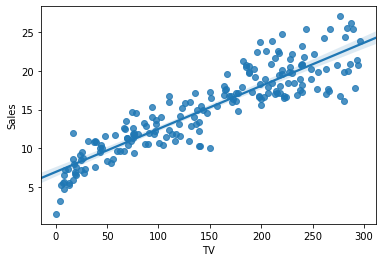

In [12]:
# visualizing the dataset
sns.regplot(x='TV', y='Sales', data=advertising)   # RegPlot is Regression Plot

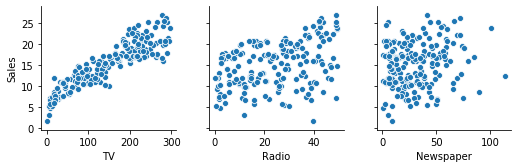

In [13]:
sns.pairplot(data=advertising,
             x_vars= ['TV','Radio','Newspaper'],
            y_vars='Sales')

In [15]:
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


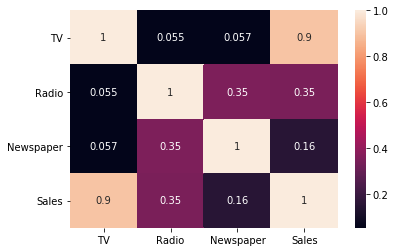

In [16]:
sns.heatmap(advertising.corr(), annot= True)

## Step 3: Performing Simple Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times TV$  --  we are taking TV sales as that is highly correlated to Total sales

The $m$ values are called the model **coefficients** or **model parameters**.

### Generic Steps in model building using `statsmodels`

We first assign the feature variable, `TV`, in this case, to the variable `X` and the response variable, `Sales`, to the variable `y`.

In [21]:
X= advertising['TV']
y=advertising['Sales']

#### Train-Test Split

You now need to split our variable into training and testing sets. You'll perform this by importing `train_test_split` from the `sklearn.model_selection` library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset

In [25]:
# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [28]:
X_train.shape

(140,)

In [29]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

#### Building a Linear Model

You first need to import the `statsmodel.api` library using which you'll perform the linear regression.

By default, the `statsmodels` library fits a line on the dataset which passes through the origin and doesn't take into account  our constant 'c'. But in order to have an intercept, you need to manually use the `add_constant` attribute of `statsmodels`. And once you've added the constant to your `X_train` dataset, you can go ahead and fit a regression line using the `OLS` (Ordinary Least Squares) attribute of `statsmodels` as shown below

In [31]:
X_train_sm= sm.add_constant(X_train)
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


`OLS` stands for Ordinary Least Squares, which is the method that `statsmodels` use to fit the line. You use the command `add_constant` so that statsmodels also fits an intercept. If you don't use this command, it will fit a line passing through the origin by default.

In [34]:
#fitting the model 
lr = sm.OLS(y_train, X_train_sm)
lr_model= lr.fit()
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

In [35]:
#sales = 6.948683 + 0.054546 * TV
# Coefficient of TV is positive since TV and Sales were positively correlated

In [39]:
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Thu, 06 Aug 2020   Prob (F-statistic):           1.52e-52
Time:                        18:01:11   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

### Summary Statistics
- The `p-values` of the coefficients (in this case just one coefficient for TV) tell you whether the coefficient is significant or not. In this case, the coefficient of TV came out to be 0.0545 with a standard error of about 0.002. Thus, you got a t-value of 24.722 which lead to a practically zero p-value. Hence, you can say that your coefficient is indeed significant. 
- `R-squared` value tells you exactly how much variance in the data has been explained by the model. In our case, the R-squared is about 0.816 which means that the model is able to explain 81.6% of the variance which is pretty good
- F-statistic and Prob(F-statistic). Now, recall that in the last segment, you did a hypothesis test for beta to determine whether or not the coefficient 
- `F-statistic` is similar in the sense that now instead of testing the significance of each of the betas, it tells you whether the overall model fit is significant or not. This parameter is examined because many a time it happens that even though all of your betas are significant, but your overall model fit might happen just by chance.The heuristic is similar to the normal p-value calculation. 
    - If the 'Prob (F-statistic)' is less than 0.05, you can conclude that the overall model fit is significant. 
    - If it is greater than 0.05, you might need to review your model as the fit might be by chance, i.e. the line may have just luckily fit the data. 
- In the image above, the p-value of the F-statistic is 1.52e-52  which is practically a zero value. This means that the model for which this was calculated is definitely significant since it is less than 0.05.

##### 1. The coefficient for TV is 0.054, with a very low p value
The coefficient is statistically significant. So the association is not purely by chance. 

##### 2. R - squared is 0.816
Meaning that 81.6% of the variance in `Sales` is explained by `TV`

This is a decent R-squared value.

###### 3. F statistic has a very low p value (practically low)
Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

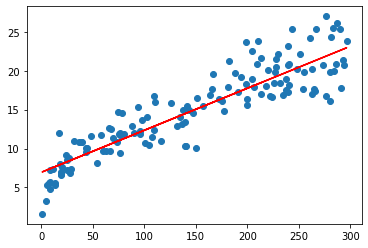

In [43]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

## Step 4: Residual analysis 
To validate assumptions of the model, and hence the reliability for inference

#### Distribution of the error terms
We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [ ]:
# error = f(y_train- y_train_pred)

In [45]:
y_train_pred = lr_model.predict(X_train_sm)  # this can also be calculated using our equation 6.948 + 0.054*X_train
res = (y_train - y_train_pred)

Text(0.5, 1.0, 'Residual Plot')

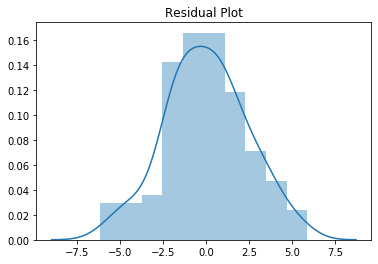

In [50]:
#plot the residuals
fig = plt.figure()
sns.distplot(res)
plt.title('Residual Plot')

The residuals are following the normally distributed with a mean 0. All good!

#### Looking for patterns in the residuals which is our another assumption for LR

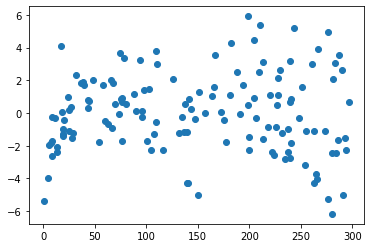

In [55]:
plt.scatter(X_train, res)

We are confident that the model fit isn't by chance, and has decent predictive power. The normality of residual terms allows some inference on the coefficients.

Although, the variance of residuals increasing with X indicates that there is significant variation that this model is unable to explain.

## Step 5: Predictions on the Test Set

Now that you have fitted a regression line on your train dataset, it's time to make some predictions on the test data. For this, you first need to add a constant to the `X_test` data like you did for `X_train` and then you can simply go on and predict the y values corresponding to `X_test` using the `predict` attribute of the fitted regression line.

In [60]:
X_test_sm = sm.add_constant(X_test)
y_pred = lr_model.predict(X_test_sm)

In [61]:
y_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [63]:
# Root Mean Squared Error
np.sqrt(mean_squared_error(y_test, y_pred))

2.019296008966233

In [64]:
#R squared = 
r_squared = r2_score(y_test, y_pred)
r_squared

0.7921031601245658

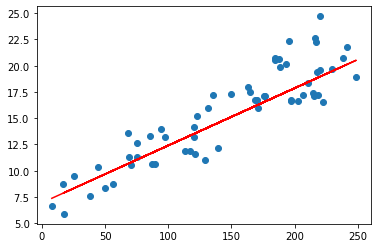

In [72]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color = 'r')

In [69]:
help(r2_score)

Help on function r2_score in module sklearn.metrics.regression:

r2_score(y_true, y_pred, sample_weight=None, multioutput='uniform_average')
    R^2 (coefficient of determination) regression score function.
    
    Best possible score is 1.0 and it can be negative (because the
    model can be arbitrarily worse). A constant model that always
    predicts the expected value of y, disregarding the input features,
    would get a R^2 score of 0.0.
    
    Read more in the :ref:`User Guide <r2_score>`.
    
    Parameters
    ----------
    y_true : array-like of shape = (n_samples) or (n_samples, n_outputs)
        Ground truth (correct) target values.
    
    y_pred : array-like of shape = (n_samples) or (n_samples, n_outputs)
        Estimated target values.
    
    sample_weight : array-like of shape = (n_samples), optional
        Sample weights.
    
    multioutput : string in ['raw_values', 'uniform_average', 'variance_weighted'] or None or array-like of shape (n_outputs)
    


### Linear Regression using `linear_model` in `sklearn`

Apart from `statsmodels`, there is another package namely `sklearn` that can be used to perform linear regression. We will use the `linear_model` library from `sklearn` to build the model. Since, we hae already performed a train-test split, we don't need to do it again.

There's one small step that we need to add, though. When there's only a single feature, we need to add an additional column in order for the linear regression fit to be performed successfully.

In [84]:
# train_test_split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.70, random_state= 100)

In [85]:
X_train_lm = X_train_lm.values.reshape(-1,1)  # for a simple linear regression with 1 variable, we need to convert series to array
X_test_lm = X_test_lm.values.reshape(-1,1)

In [86]:
print(X_train_lm.shape)
print(y_train_lm.shape)
print(X_test_lm.shape)
print(y_test_lm.shape)

(140, 1)
(140,)
(60, 1)
(60,)


In [87]:
# Creating an object of Linear regression
lm= LinearRegression()

In [88]:
# Fit the model
lm.fit(X_train_lm, y_train_lm)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [89]:
# See the parameters
print(lm.coef_)
print(lm.intercept_)

[0.05454575]
6.948683200001357


In [91]:
#Make Predictions
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

In [93]:
r2 = r2_score(y_test_lm, y_test_pred)
print(r2)

0.7921031601245662


### Correlation (Pearson) is also called "r" or "Pearson's R"

R squared is normalized whereas RMSE is not. RMSE depends on the units of the Y variables.While it can't really tell you of the gooodness of the particular model, it can help you compare models.

In [94]:
corrs = np.corrcoef(X_train, y_train)
print(corrs)

[[1.         0.90321277]
 [0.90321277 1.        ]]


In [96]:
corrs[0,1]
corrs[0,1] ** 2

0.8157933136480384